In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
os.chdir('C:\\Users\\HP\\Desktop\\DATA_SCIENCE\\python_project-1')

In [3]:
df = pd.read_csv("playstore-analysis.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# 1. Data clean up – Missing value treatment

a. Drop records where rating is missing since rating is our target/study variable


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
df.dropna(subset=['Rating'],inplace=True)
df.shape


(9367, 13)

In [8]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

# b. Check the null values for the Android Ver column.
i. Are all 3 records having the same problem?
ii. Drop the 3rd record i.e. record for “Life Made WIFI …”
iii. Replace remaining missing values with the mode

In [9]:
df['Android Ver'].isnull().sum()

3

In [10]:
df[df.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.000000,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.000000,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.000000,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.000000,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
df.drop(10472,inplace = True)
df[df.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [12]:
df['Android Ver'].mode()

0    4.1 and up
dtype: object

In [13]:
df['Android Ver'].fillna('4.1 and up',inplace=True)

In [14]:
df['Current Ver'].mode()

0    Varies with device
dtype: object

In [15]:
df['Current Ver'].fillna( "Varies with device",inplace=True)

In [16]:
print(df.loc[[7333]])

              App Category  Rating Reviews     Size Installs  Type  Price  \
7333  Dots puzzle   FAMILY     4.0     179  14000.0  50,000+  Paid  $0.99   

     Content Rating  Genres    Last Updated         Current Ver Android Ver  
7333       Everyone  Puzzle  April 18, 2018  Varies with device  4.0 and up  


In [17]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 2. Data clean up – correcting the data types
a. Which all variables need to be brought to numeric types?


In [18]:
df['Reviews'] = df['Reviews'].astype(int)

In [19]:
df['Size'] = df['Size'].astype(int)

b. Price variable – remove $ sign and convert to float

In [20]:
df['Price'] = df['Price'].str.replace('$', '')

C:\Users\HP\AppData\Local\Temp/ipykernel_17660/961214681.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')


In [21]:
df['Price'] = df['Price'].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int32(2), object(9)
memory usage: 1.2+ MB


c. Installs – remove ‘,’ and ‘+’ sign, convert to integer d. Convert all other identified columns to numeric

In [23]:
df['Installs'] = df['Installs'].str.replace(',', '')

In [24]:
df['Installs'] = df['Installs'].str.replace('+', '')

C:\Users\HP\AppData\Local\Temp/ipykernel_17660/126296622.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+', '')


In [25]:
df['Installs'] = df['Installs'].astype(int)

In [26]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int32(3), object(8)
memory usage: 1.1+ MB


# 3. Sanity checks – check for the following and handle accordingly

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play
store.
i. Are there any such records? Drop if so.

In [28]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [29]:
for i in df['Rating'].unique():

        if i<1 and i>5:
            print('Not allowed')
        
    

In [30]:
df.shape

(9366, 13)

Yes all Avg. rating values is in between 1 and 5.
    i. No such record has been oberved.

b. Reviews should not be more than installs as only those who installed can review the
app.
i. Are there any such records? Drop if so.

In [31]:
df2 = df[df.Reviews <= df.Installs]
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [32]:
df2.shape

(9359, 13)

# 4. Identify and handle outliers –

a. Price column

i. Make suitable plot to identify outliers in price

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


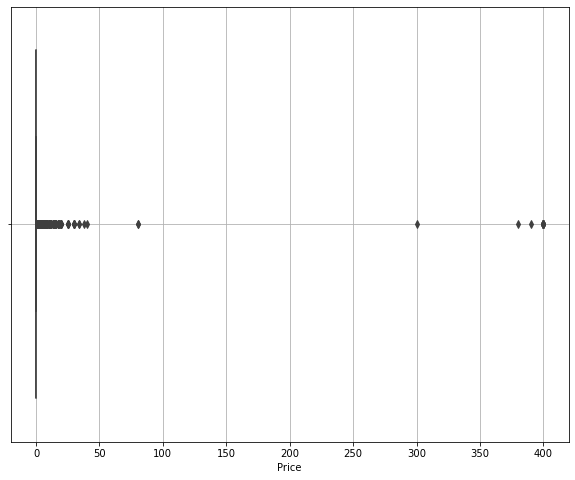

In [33]:
plt.subplots(figsize=(10,8))
sns.boxplot(df2.Price)
plt.grid()
plt.show()

ii. Do you expect apps on the play store to cost $200? Check out these cases

In [34]:
df3 = df2[df2.Price <200]
df3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


iii. After dropping the useless records, make the suitable plot again to identify
outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


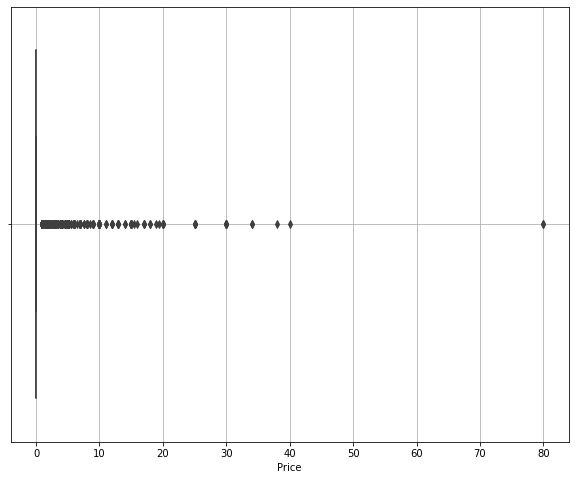

In [35]:
plt.subplots(figsize=(10,8))
sns.boxplot(df3.Price)
plt.grid()
plt.show()

iv. Limit data to records with price < $30

In [36]:
df4 = df3[df3['Price'] < 30]
df4

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


b. Reviews column
    i. Make suitable plot

<AxesSubplot:xlabel='Reviews', ylabel='Category'>

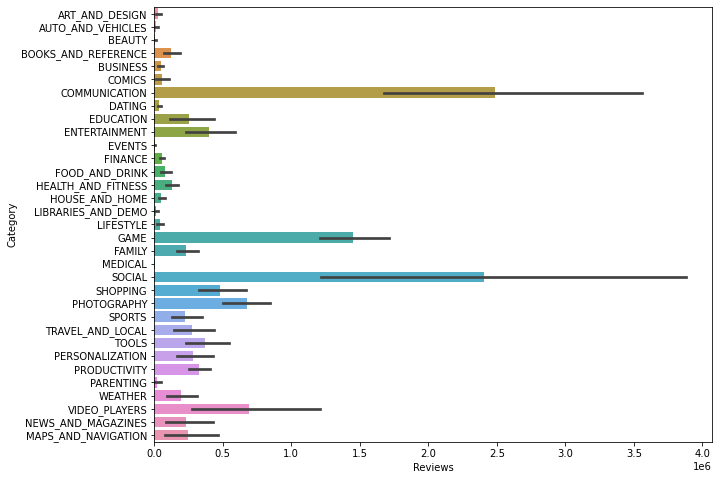

In [37]:
plt.subplots(figsize=(10,8))
sns.barplot( x='Reviews',y='Category', data=df4)
###sns.barplot( x='Reviews',y='Category', data=df4,order=df4.sort_values('Reviews').Category)

ii. Limit data to apps with < 1 Million reviews

In [38]:
limit_data_by_review = df4[df4['Reviews'] < 1000000]
limit_data_by_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# c. Installs
     i. What is the 95th percentile of the installs?

In [39]:
np.percentile(df4['Installs'],95)

100000000.0

In [40]:
np.percentile(df4.Installs,95)

100000000.0

95th percentile of the installs is 100000000.0

ii. Drop records having a value more than the 95th percentile

In [41]:
df4[df4.Installs < np.percentile(df4.Installs,95)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Data analysis to answer business questions

5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower
values?
a. How do you explain this?


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


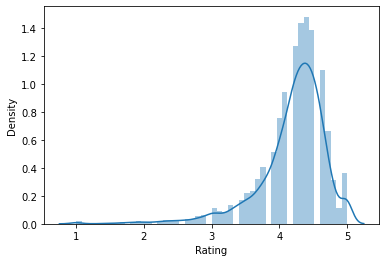

In [42]:
sns.distplot(df['Rating'])
plt.show()

Above plot clearly showing that data of rating is left skewed it also called as negative skewed.left skewed distribution long tail region in negative direction.
  properties of left/negative skewed distribution
  1. mean less than the mode
  2.median less than the mode
  3.mean less than median

Here the distribution tells that most of the rating is in between 4 to 5.

b. What is the implication of this on your analysis?

in real life skewed disrtibution is created problems to run ML model, many statistical model don’t work.
So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect 
the model’s performance especially regression-based models.
So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will allow us to try more number of statistical model.

Conclusion:
If we have a skewed data then it may harm our results. So, in order to use a skewed data we have to apply a log transformation over the whole set of values to discover patterns in the data and make it usable for the statistical model.

# 6. What are the top Content Rating values?

b. If yes, drop those as they won’t help in the analysis

In [43]:
df4['Content Rating'].value_counts()

Everyone           7394
Teen               1082
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Top content rating values =   
   Everyone    -       7394
   Teen         -      1082
   Mature 17+   -       461
 
 
 a. Are there any values with very few records?
    Unrated    =           1
   
b. If yes, drop those as they won’t help in the analysis

In [44]:
unrated =df4[df4['Content Rating'] == 'Unrated'].index.to_list()
df4.drop(unrated, inplace = True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
df4['Content Rating'].value_counts()

Everyone           7394
Teen               1082
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Name: Content Rating, dtype: int64

#  7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating

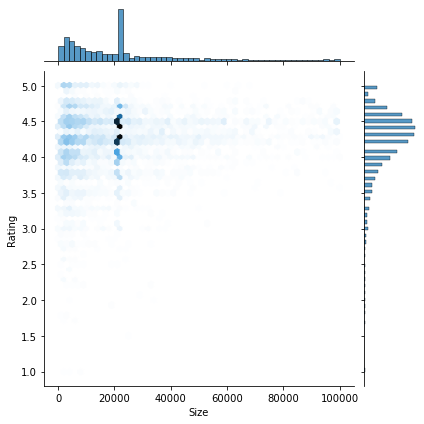

In [46]:
sns.jointplot(x=df4['Size'],y=df4['Rating'],data=df4,kind='hex')
plt.show()

b. Do you see any patterns?
c. How do you explain the pattern?

We observed that the maximum data point gather in between Rating 4.0-4.5 and size 0-40000(40 mb).
Meaning is that the application size which is in between 0-40000(40 mb) get good rating on play store

# 8. Effect of price on rating
a. Make a jointplot (with regression line)

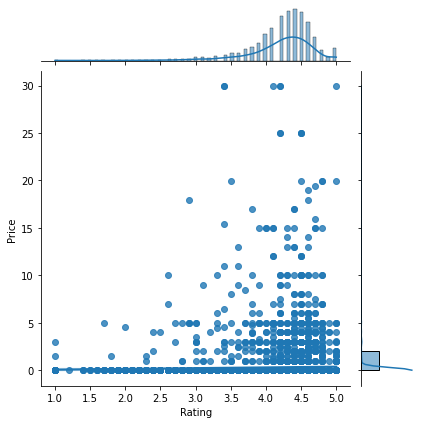

In [47]:
sns.jointplot(x ="Rating" , y = "Price" ,data = df4,kind = "reg")
plt.show()

b. What pattern do you see?
c. How do you explain the pattern?

increasing the price, Rating Increases

d. Replot the data, this time with only records with price > 0

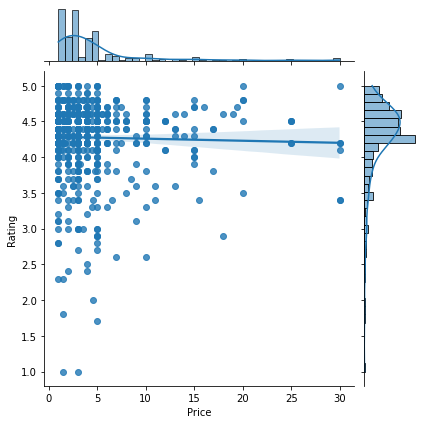

In [48]:
Price_greaterthan_zero = df4[df4['Price'] > 0]
sns.jointplot(x ="Price" , y = "Rating" ,data = Price_greaterthan_zero, kind = "reg" )
plt.show()

e. Does the pattern change?
f. What is your overall inference on the effect of price on the rating

.
*
*

# 9. Look at all the numeric interactions together –
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

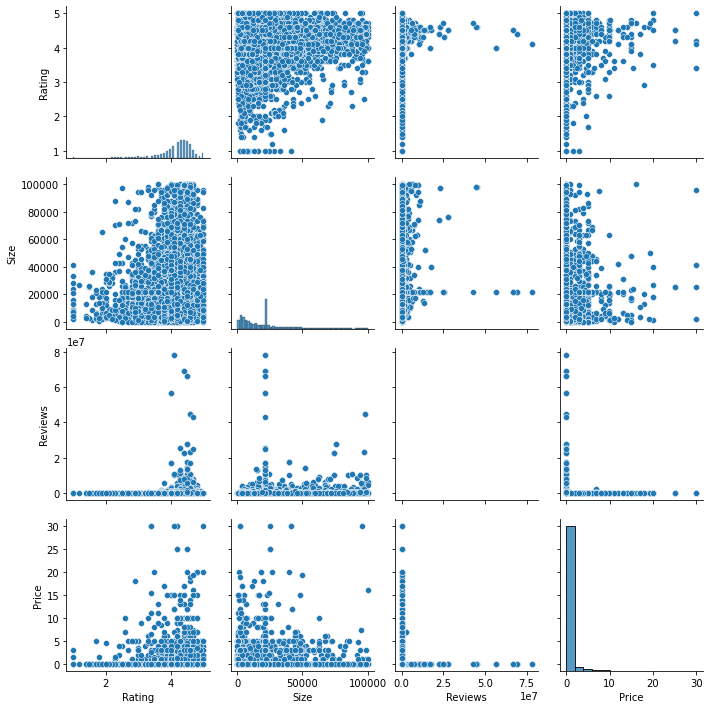

In [49]:
sns.pairplot(df4,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

# 10. Rating vs. content rating
a. Make a bar plot displaying the rating for each content rating

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

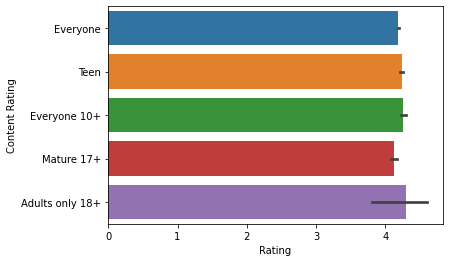

In [50]:
sns.barplot(x='Rating', y='Content Rating', data=df4)

b. Which metric would you use? Mean? Median? Some other quantile?
c. Choose the right metric and plot

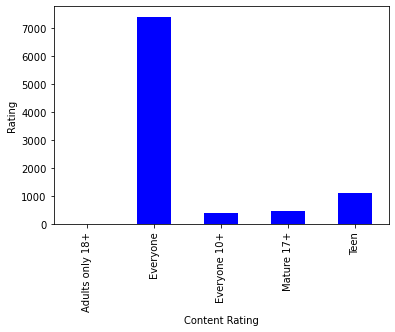

In [51]:
df4.groupby(['Content Rating'])['Rating'].count().plot.bar(color="b")
plt.ylabel('Rating')
plt.show()

# 11. Content rating vs. size vs. rating – 3 variables at a time
a. Create 5 buckets (20% records in each) based on Size

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


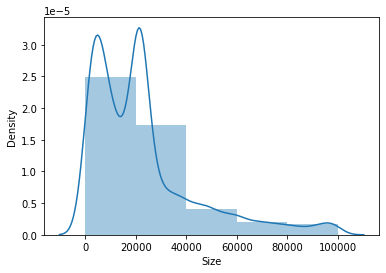

In [52]:
sns.distplot(df["Size"], bins=5)
plt.show()

In [54]:

bins=[0, 4600, 12000, 21516, 32000, 100000]
df4['Size_Buckets'] = pd.cut(df4['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(df4, values='Rating', index='Size_Buckets', columns='Content Rating')





C:\Users\HP\AppData\Local\Temp/ipykernel_17660/2454340770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Size_Buckets'] = pd.cut(df4['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])


Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,,
VERY LOW,NaN,4.117228,4.188889,3.951429,4.225773
LOW,4.6,4.162179,4.207143,4.129592,4.209655
MED,3.8,4.242463,4.262602,4.091975,4.205630
HIGH,NaN,4.179011,4.209375,4.168333,4.213158
VERY HIGH,4.5,4.209349,4.287805,4.197170,4.279603


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each
combination

In [55]:
df4.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     5100.0
0.4    14000.0
0.6    21516.0
0.8    34000.0
Name: Size, dtype: float64

In [56]:
df4.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

In [ ]:
c. Make a heatmap of this

i. Annotated

ii. Greens color map

In [57]:
Size_Buckets =pd.pivot_table(df4, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,,
VERY LOW,NaN,3.8,3.84,3.28,3.90
LOW,4.6,3.8,3.94,3.64,3.88
MED,3.8,4.0,4.10,3.90,3.90
HIGH,NaN,3.9,4.00,3.90,4.00
VERY HIGH,4.5,3.9,4.10,4.00,4.00


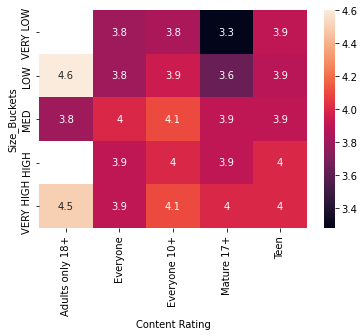

In [58]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

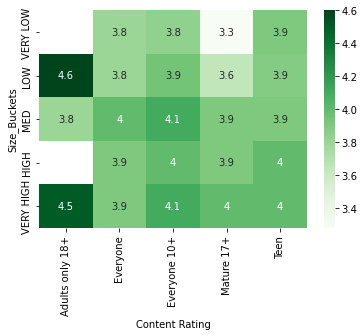

In [59]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Yes, most of havier apps seems to be more preferred in all the Content Ratings. But, not to a big variations in it.
Except, Mature 17+ where low size apps arent preferred to a greater variation.